# Kütüphaneler Yüklendi 

In [1]:
#Kütüphane yüklemeleri
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from PIL import Image

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras_tuner as kt
from sklearn.metrics import classification_report
print("TensorFlow version:", tf.__version__)

C:\Users\Tao\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


TensorFlow version: 2.8.0


# Veri Setin Yüklemesi
Veri seti desktop local ortama indirilip ilgili path yolu tanımalamları yapılarak yüklenmiştir.

data, labels adında boş bir

In [2]:
#Veri setinin yolu bildirilioyr ve sınıf bilgileri içeri aktarılıyor
path = "C:\\Users\\Tao\\Downloads\\archive\\Train\\"
df_classes = pd.read_csv(r"C:\Users\Tao\Downloads\archive\Classes.csv",sep=";")
data = []
labels = []
classes = len(df_classes)


# Görsel veri eti içeri aktarıldı
Görsel ilgili klasörden tek tek okunarak içeri aktarıldı.
39209 adet görüntü olduğunu görmekteyiz.

In [3]:
#Veri seti içeri aktarıldı
for i in range(classes):
    img_path = os.path.join(path,str(i)) 
    for img in os.listdir(img_path):
        im = Image.open(img_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data.append(im)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
data.shape

(39209, 32, 32, 3)

# Sınıflandırma etiketleri ve frekans tablosu
Veri setimizdeki sınıf etiketleri tablo şeklinde frekansları ve görsel grafik şeklinde gösterildi.

En fazla bulunan etiketlerin ilk 2'si,

Speed limit (30km/h)= 2220

Speed limit (50km/h)= 2250 adet olduğu gözükmektedir.



                        ClassName  Freq
0            Go straight or left    210
1            Speed limit (20km/h)   210
2           Dangerous curve left    210
3     End speed + passing limits    240
4              End of no passing    240
5   End no passing veh > 3.5 tons   240
6                    Pedestrians    240
7      Road narrows on the right    270
8              Bicycles crossing    270
9                      Keep left    300
10                  Double curve    330
11         Dangerous curve right    360
12          Roundabout mandatory    360
13          Go straight or right    390
14                    Bumpy road    390
15   End of speed limit (80km/h)    420
16               Turn left ahead    420
17     Veh > 3.5 tons prohibited    420
18             Beware of ice/snow   450
19                 Slippery road    510
20             Children crossing    540
21               Traffic signals    600
22                   No vehicles    630
23              Turn right ahead    689


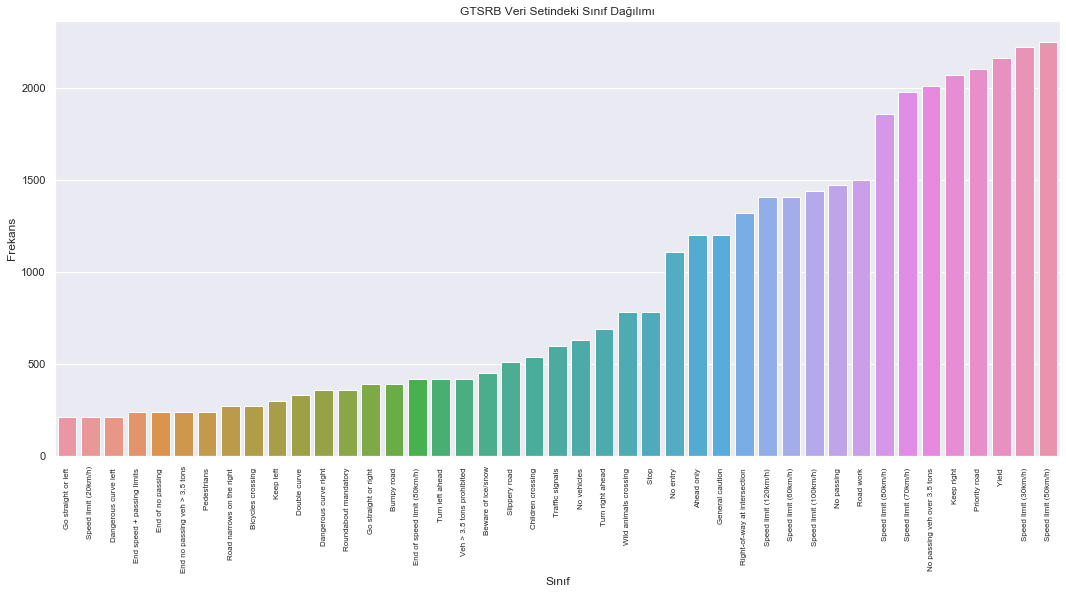

In [4]:
#Sınıf dağılımı görselleştirildi ve frekans tablosu oluşturuldu
df1 = pd.DataFrame(labels,columns=["ClassId"])
class_join = pd.merge(df1,  
                      df_classes,  
                      on ='ClassId',  
                      how ='inner') 

class_grouped=class_join.groupby('ClassName')['ClassId'].count().to_frame().reset_index()
class_grouped=pd.DataFrame(class_grouped)
class_grouped=class_grouped.rename(columns={"ClassName": "ClassName", "ClassId": "Freq"})
class_grouped= class_grouped.sort_values(['Freq']).reset_index(drop=True)
print(class_grouped)

# Seaborn ile sınıf dağılım grafiği çizdirildi
sns.set(rc = {'figure.figsize':(18,8)})
sns.barplot(x=class_grouped['ClassName'], y=class_grouped['Freq'])
plt.xlabel('Sınıf')
plt.xticks(rotation='vertical',fontsize=8)
plt.ylabel('Frekans')
plt.title('GTSRB Veri Setindeki Sınıf Dağılımı')
plt.show()

# Görüntünün gösterilmesi

9 tane görüntünün görselleri aşağıdaki gibi gösterilmiştir.

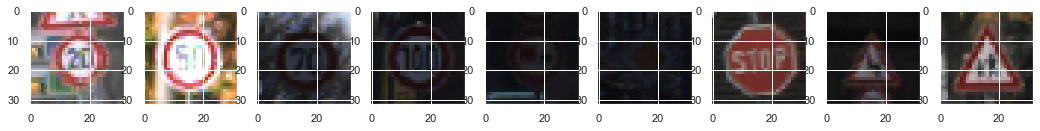

In [5]:
#Veri setinden örnekler görsel olarak gösterildi
#figure(figsize=[20,20])
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(1, 9)
ax1.imshow(data[1])
ax2.imshow(data[3000])
ax3.imshow(data[7001])
ax4.imshow(data[11000])
ax5.imshow(data[15000])
ax6.imshow(data[19000])
ax7.imshow(data[23000])
ax8.imshow(data[27000])
ax9.imshow(data[31000])


# Veri tipi dönüşümü
x değişkeni veri  tipi değiştirildi , y değişkenindeki sınıf bilgileri kategorik yapıya dönüştürüldü

In [6]:
#x değişkeni veri  tipi değiştirildi , y değişkenindeki sınıf bilgileri kategorik yapıya dönüştürüldü
x = data.astype('float32')
y = keras.utils.to_categorical(np.array(labels))

# Eğitim, Test ve Validasyon veri setleri oluşturma
Eğitim veri seti için genel veri setinin %80 ' ayrılıyor.

Kalan %20'lik veri seti içinde de %50,%50 olacak şekilde test ve validasyon veri seti olarak ayrılıyor.

In [7]:
#Eğitim,Test ve Validasyon veri setleri oluşturuldu
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, shuffle=True,stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_val,y_val, test_size=0.5, shuffle=True)


C:\Users\Tao\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\Tao\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

# Feature Scaling
Veriler Mix Max ölçeklemesi ile dönüştürüldü.

In [8]:
for i in range(len(x_train)):
    for a in range(31):
        x_train[i][a]= MinMaxScaler().fit_transform(x_train[i][a])

for i in range(len(x_val)):
    for a in range(31):
        x_val[i][a]= MinMaxScaler().fit_transform(x_val[i][a])

for i in range(len(x_test)):
    for a in range(31):
         x_test[i][a]= MinMaxScaler().fit_transform(x_test[i][a])

# Base Model

Keras ile model kuruldu. Kendi parametrelerimi belirledim rastgele. Veriler Flatten ile düzleştirildi. BatcNormalization yapıldı. 3 tane 300 nöronluk ara katman relu aktivasyonlu ve çıkış olarakda 43 nöronluk softmax aktivasyonlu model kuruldu.

Aşağıda Hiper-parametre GRidSearch ile de model kuruldu sonuçlar karşılaştırılacak.

In [32]:
#Model yapısı kuruldu
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(43, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 batch_normalization (BatchN  (None, 3072)             12288     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                        

# Kurulan modelin yapısı
Modelin yapısı şema halinde gösterildi. 

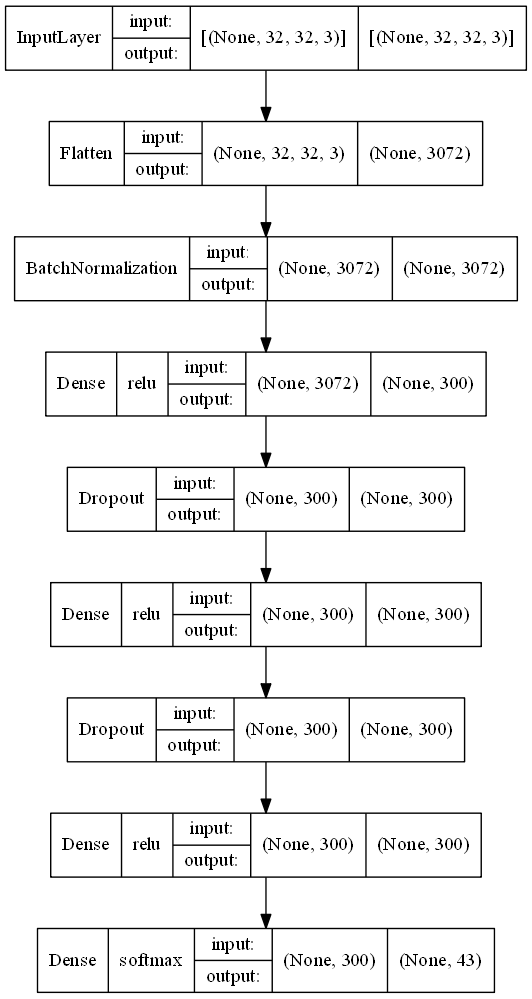

In [33]:
#Model görselleştirildi
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=False,
    dpi=100,
    show_layer_activations=True
)


# Model Compile
Model compile edildi. optimizer olarak sgd, karşılaştırma metriği olarak accuracy belirlendi. Loss olarak kategorik Y değişkenimiz olduğu için "categorical_crossentropy" seçildi.

In [34]:
#Model compile edildi
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Model eğitiliyor
Kurulan model fit komutu ile eğitiliyor. epochs değeri 100 batch_size değeri 32 seçilmiştir.

In [35]:
#Model eğitimi yapıldı
history= model.fit(x_train,y_train, epochs=100, batch_size=32,validation_data=(x_val,y_val))

Epoch 1/100
981/981 [==============================] - 8s 8ms/step - loss: 2.2009 - accuracy: 0.3942 - val_loss: 0.9279 - val_accuracy: 0.7286
Epoch 2/100
981/981 [==============================] - 7s 7ms/step - loss: 1.0744 - accuracy: 0.6661 - val_loss: 0.5563 - val_accuracy: 0.8227
Epoch 3/100
981/981 [==============================] - 8s 8ms/step - loss: 0.7760 - accuracy: 0.7561 - val_loss: 0.4026 - val_accuracy: 0.8773
Epoch 4/100
981/981 [==============================] - 7s 7ms/step - loss: 0.6352 - accuracy: 0.8004 - val_loss: 0.3428 - val_accuracy: 0.8998
Epoch 5/100
981/981 [==============================] - 7s 7ms/step - loss: 0.5534 - accuracy: 0.8255 - val_loss: 0.2969 - val_accuracy: 0.9135
Epoch 6/100
981/981 [==============================] - 7s 7ms/step - loss: 0.4872 - accuracy: 0.8482 - val_loss: 0.2913 - val_accuracy: 0.9112
Epoch 7/100
981/981 [==============================] - 7s 7ms/step - loss: 0.4389 - accuracy: 0.8618 - val_loss: 0.2500 - val_accuracy: 0.9309

Epoch 58/100
981/981 [==============================] - 7s 8ms/step - loss: 0.0787 - accuracy: 0.9747 - val_loss: 0.1179 - val_accuracy: 0.9697
Epoch 59/100
981/981 [==============================] - 7s 7ms/step - loss: 0.0789 - accuracy: 0.9751 - val_loss: 0.1289 - val_accuracy: 0.9663
Epoch 60/100
981/981 [==============================] - 7s 7ms/step - loss: 0.0721 - accuracy: 0.9768 - val_loss: 0.1090 - val_accuracy: 0.9709
Epoch 61/100
981/981 [==============================] - 7s 7ms/step - loss: 0.0723 - accuracy: 0.9764 - val_loss: 0.1135 - val_accuracy: 0.9689
Epoch 62/100
981/981 [==============================] - 7s 7ms/step - loss: 0.0746 - accuracy: 0.9751 - val_loss: 0.1266 - val_accuracy: 0.9663
Epoch 63/100
981/981 [==============================] - 7s 7ms/step - loss: 0.0729 - accuracy: 0.9772 - val_loss: 0.1262 - val_accuracy: 0.9689
Epoch 64/100
981/981 [==============================] - 7s 7ms/step - loss: 0.0709 - accuracy: 0.9769 - val_loss: 0.1198 - val_accuracy:

# Accuracy ve Loss Grafiği
100 epochda her bir epochdaki loss ve accuracy değerleri gösterilmiştir. Aynı şekilde grafikde validasyon tarafındaki loss ve accuracy değerleri verilmişti.r

Validasyon tarafındaki değerlerde hemen hemen eğitim ile aynı çıkmıştır. Burada overfitting olmadığını söyleyebiliriz.

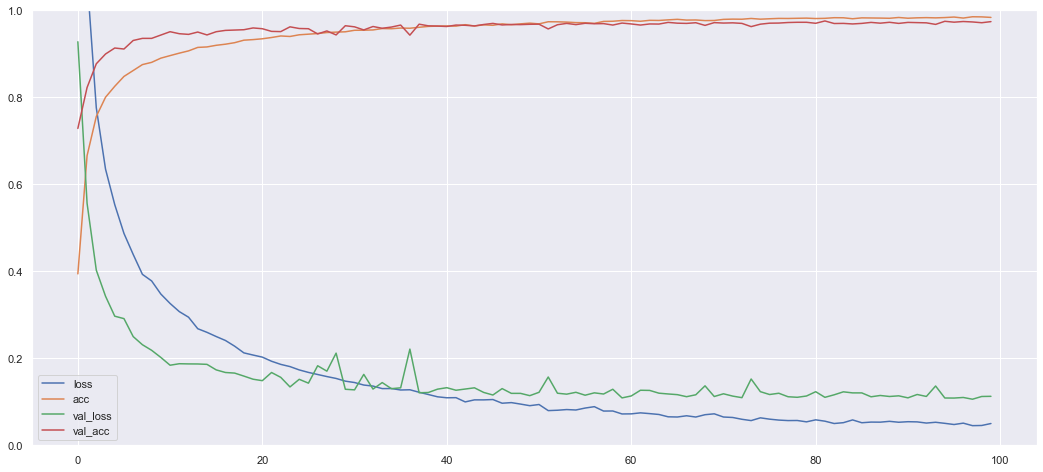

In [36]:

a=pd.DataFrame(history.history)

plt.plot(a)
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(["loss","acc","val_loss","val_acc"])


# Test, Training ve Validasyon Accuracy karşılaştırması

Test, training ve validasyon accuracy değerleri birbirlerine yakın beklendiği gibi train tarafında bir miktar daha yüksek çıkmıştır. 

Kabul edilebilir değerdeler. İşlemlere devam edebiliriz.

In [37]:

y_pred =np.argmax( model.predict(x_test),axis=1)
y_pred
np.argmax(y_test,axis=1)
print('- Test set accuracy: {:.2f}%\n- Training accuracy: {:.2f}%\n- Validation accuracy: {:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))



- Test set accuracy: 97.25%
- Training accuracy: 98.39%
- Validation accuracy: 97.42%


# Sınıflandırma Raporu tablosu
classification_report ile Test veri kümesindeki bir sınıf için Precision, recall ve f1 score ları hesaplanmıştır.

Precision, Positive olarak tahminlediğimiz değerlerin gerçekten kaç adedinin Positive olduğunu göstermektedir. Sınıflara baktığımızda 5. sınıf diğerlerine göre düşük kalmıştır.

Recall, Positive olarak tahmin etmemiz gereken işlemlerin ne kadarını Positive olarak tahmin ettiğimizi gösteren bir metriktir. Bu değerde ise 3. ve 24. sınıflarda doğru bilme oranı düşük kalnıştır diğerlerine göre

F1 Score değerinin kullanılmasının en temel sebebi eşit dağılmayan veri kümelerinde hatalı bir model seçimi yapmamaktır. Ayrıca sadece False Negative ya da False Positive değil tüm hata maliyetlerini de içerecek bir ölçme metriğine ihtiyaç duyulduğu içinde F1 Score bizim için çok önemlidir. Neredeyse bütün sınıf sonuçları iyi diyebilirken, 3. ve 5. sınıflarda diğerlerine göre çokda olmasada birazdüşük kalmıştır.

In [38]:

print(classification_report(np.argmax(y_test,axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.98      0.97      0.98       224
           2       0.98      0.96      0.97       223
           3       0.95      0.87      0.91       142
           4       0.98      0.99      0.98       210
           5       0.87      0.96      0.91       186
           6       1.00      1.00      1.00        49
           7       0.94      0.96      0.95       137
           8       0.94      0.96      0.95       151
           9       1.00      0.96      0.98       145
          10       0.99      0.99      0.99       192
          11       0.99      0.99      0.99       124
          12       1.00      1.00      1.00       218
          13       0.99      1.00      0.99       206
          14       0.99      1.00      0.99        84
          15       0.94      0.94      0.94        72
          16       0.97      1.00      0.99        35
          17       0.99    

# Confusion matrix 

Grafik incelendiğinde 3. sınıfda ki değerlerde 5. sınıf dediği 14 tane görüntü vardır. Diğer yanlış tahmin edilen gözelerden gözle görülür şekilde ayrışmıştır. 

Text(0.5, 1, 'Confusion Matrix')

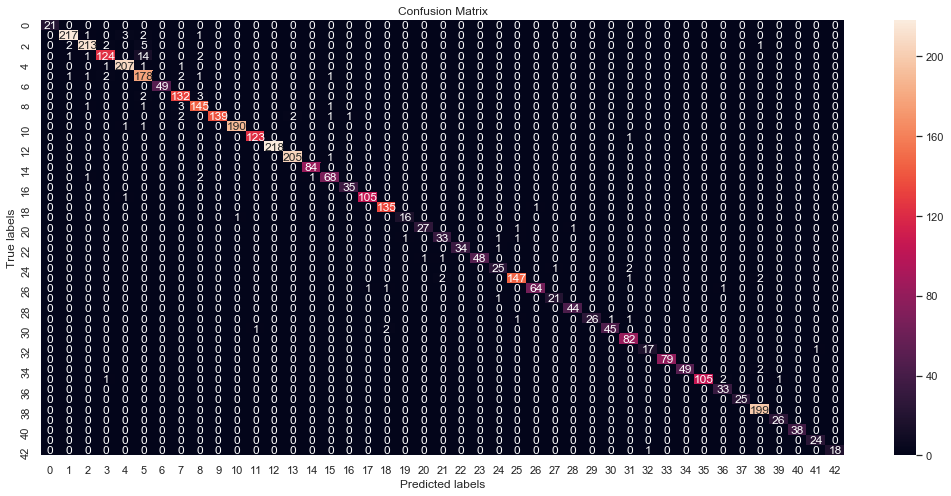

In [39]:


cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
sns.set(rc = {'figure.figsize':(18,8)})
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


# Hiper parametre için model kurulması

gizli katman 0 ile 5
nöron 200 ile 500
öğrenme oranı 0,0001 ile 0,001
optimizasyon için sgd yada adam
ve son çıktı katmanında ise 43 nöronluk bir katman vardır. aktivasyon foknsiyonu softmaxdır.

In [9]:
#Model yapısı
def build_model(hp):
    n_hidden=hp.Int("n_hidden",min_value=0,max_value=5,default=2)
    n_neurons=hp.Int("n_neurons",min_value=200,max_value=500)
    learning_rate=hp.Float("learning_rate",min_value="1e-3",max_value="1e-2", sampling="log")
    optimizer=hp.Choice("optimizer",values=["sgd","adam"])
    if optimizer=="sgd":
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model_h=tf.keras.Sequential()
    model_h.add(keras.layers.BatchNormalization())
    model_h.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
    #model.add(tf.keras.layers.Dense(500, activation="relu"))
    for _ in range(n_hidden):
        #model.add(keras.layers.Dropout(0.4))
        model_h.add(tf.keras.layers.Dense(n_neurons, activation="relu"))        
    model_h.add(tf.keras.layers.Dense(43, activation="softmax"))
    model_h.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    return model_h

# En iyi hiper parametre bulucu olarak GridSearch kullanılacak

In [10]:
#Hiper-parametre GRidSearch
grid_search_tuner=kt.GridSearch(
        build_model,
        objective="val_accuracy",
        max_trials=5,
        overwrite=True,
        seed=42)
grid_search_tuner.search(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val))


Trial 5 Complete [00h 01m 02s]
val_accuracy: 0.18592195212841034

Best val_accuracy So Far: 0.8900790810585022
Total elapsed time: 00h 05m 21s


# En iyi parametre

GridSearch sonucunda en iyi parametre bilgisi ekrana yazdırılmıştır.

In [11]:
#En iyi parametre

best_models = grid_search_tuner.get_best_models(num_models=1)
model_p=best_models[0]
best_parameters=grid_search_tuner.get_best_hyperparameters(num_trials=1)
best_parameters[0].values


{'n_hidden': 2, 'n_neurons': 200, 'learning_rate': 0.001, 'optimizer': 'adam'}

# Yukarıda belirlenen en iyi parametre için model kurulumu

{'n_hidden': 2, 'n_neurons': 200, 'learning_rate': 0.001, 'optimizer': 'adam'}

Parametreleri ile model kurulup görselleştirmesi ve tablolaları oluşturulacaktır.

In [12]:
#history_p= model_p.fit(x_train,y_train, epochs=100, batch_size=32,validation_data=(x_val,y_val))
#Model yapısı kuruldu
model_b = keras.models.Sequential()
model_b.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model_b.add(keras.layers.BatchNormalization())
model_b.add(keras.layers.Dense(200, activation="relu"))
model_b.add(keras.layers.Dropout(0.4))
model_b.add(keras.layers.Dense(200, activation="relu"))
model_b.add(keras.layers.Dense(43, activation="softmax"))
optimizer = keras.optimizers.Adam(lr=0.001)
model_b.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 43)                8643      
                                                      

C:\Users\Tao\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Model eğitimi

Gridsearch sonucunda elde edilen parametrelere ait model eğitiliyor.

In [13]:
history_b= model_b.fit(x_train,y_train, epochs=50, batch_size=32,validation_data=(x_val,y_val))

Epoch 1/50
981/981 [==============================] - 6s 6ms/step - loss: 1.2524 - accuracy: 0.6525 - val_loss: 0.4629 - val_accuracy: 0.8595
Epoch 2/50
981/981 [==============================] - 6s 6ms/step - loss: 0.6125 - accuracy: 0.8160 - val_loss: 0.3323 - val_accuracy: 0.9000
Epoch 3/50
981/981 [==============================] - 6s 6ms/step - loss: 0.4910 - accuracy: 0.8496 - val_loss: 0.2770 - val_accuracy: 0.9181
Epoch 4/50
981/981 [==============================] - 6s 6ms/step - loss: 0.4168 - accuracy: 0.8719 - val_loss: 0.2589 - val_accuracy: 0.9209
Epoch 5/50
981/981 [==============================] - 6s 6ms/step - loss: 0.3730 - accuracy: 0.8841 - val_loss: 0.2522 - val_accuracy: 0.9197
Epoch 6/50
981/981 [==============================] - 6s 6ms/step - loss: 0.3408 - accuracy: 0.8940 - val_loss: 0.2044 - val_accuracy: 0.9388
Epoch 7/50
981/981 [==============================] - 6s 6ms/step - loss: 0.3129 - accuracy: 0.9035 - val_loss: 0.2155 - val_accuracy: 0.9352
Epoch 

# Sınıflandırma raporu

classification_report ile Test veri kümesindeki bir sınıf için Precision, recall ve f1 score ları hesaplanmıştır.

Precision, Positive olarak tahminlediğimiz değerlerin gerçekten kaç adedinin Positive olduğunu göstermektedir. Sınıflara baktığımızda 41. sınıf diğerlerine göre düşük kalmıştır.

Recall, Positive olarak tahmin etmemiz gereken işlemlerin ne kadarını Positive olarak tahmin ettiğimizi gösteren bir metriktir. Bu değerde ise 32. sınıf diğer sınıf değerlerine göre düşük kalmıştır.

F1 Score değerinin kullanılmasının en temel sebebi eşit dağılmayan veri kümelerinde hatalı bir model seçimi yapmamaktır. Ayrıca sadece False Negative ya da False Positive değil tüm hata maliyetlerini de içerecek bir ölçme metriğine ihtiyaç duyulduğu içinde F1 Score bizim için çok önemlidir. 41. sınıf değerindeki F1 skoru diğer sınıf değerlerine göre düşük kalmıştır.

In [17]:

y_pred_b =np.argmax( model_b.predict(x_test),axis=1)
print(classification_report(np.argmax(y_test,axis=1), y_pred_b))


              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.97      0.98      0.98       220
           2       0.99      0.96      0.97       221
           3       0.92      0.90      0.91       132
           4       0.96      0.97      0.97       211
           5       0.90      0.95      0.92       200
           6       0.98      1.00      0.99        40
           7       1.00      0.96      0.98       126
           8       0.94      0.96      0.95       138
           9       0.98      0.98      0.98       150
          10       1.00      0.98      0.99       205
          11       0.99      0.98      0.98       129
          12       1.00      1.00      1.00       216
          13       1.00      0.99      0.99       203
          14       0.99      0.97      0.98        78
          15       0.96      0.98      0.97        56
          16       1.00      1.00      1.00        40
          17       0.99    

# Test, Training ve Validasyon Accuracy karşılaştırması

Test, training ve validasyon accuracy değerleri birbirlerine yakın fakat test veri setindeki accuracy değeri daha yüksek çıkmıştır.

Kabul edilebilir değerdeler. İşlemlere devam edebiliriz.

Base modele göre daha kötü performası vardır.

In [18]:
print('- Test set accuracy: {:.2f}%\n- Training accuracy: {:.2f}%\n- Validation accuracy: {:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_b)*100,(history_b.history['accuracy'][-1])*100,(history_b.history['val_accuracy'][-1])*100))

- Test set accuracy: 97.32%
- Training accuracy: 96.38%
- Validation accuracy: 96.74%


# Accuracy ve Loss Grafiği
50 epochda her bir epochdaki loss ve accuracy değerleri gösterilmiştir. Aynı şekilde grafikde validasyon tarafındaki loss ve accuracy değerleri verilmişti.r

Validasyon tarafındaki değerlerde hemen hemen eğitim ile aynı çıkmıştır. Burada overfitting olmadığını söyleyebiliriz.

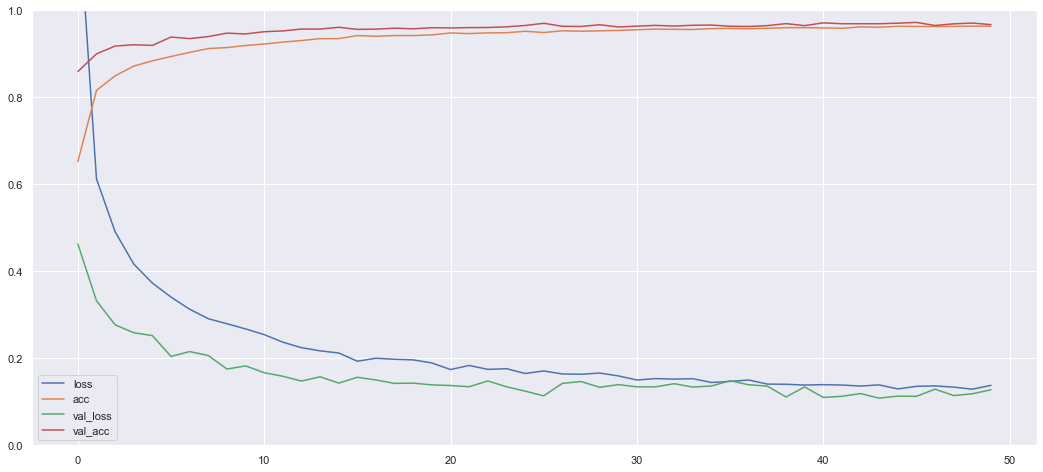

In [15]:

b=pd.DataFrame(history_b.history)

plt.plot(b)
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(["loss","acc","val_loss","val_acc"])

# Confusion matrix 

Grafik incelendiğinde 3. sınıfda ki değerlerde 5. sınıf dediği 9 tane görüntü vardır base modele göre daha iyi. Fakat 41. sınıfken 31. sınıf dediği sayıda 6 dır. Diğer yanlış tahmin edilen gözelerden gözle görülür şekilde ayrışmıştır. 

Text(0.5, 1, 'Confusion Matrix')

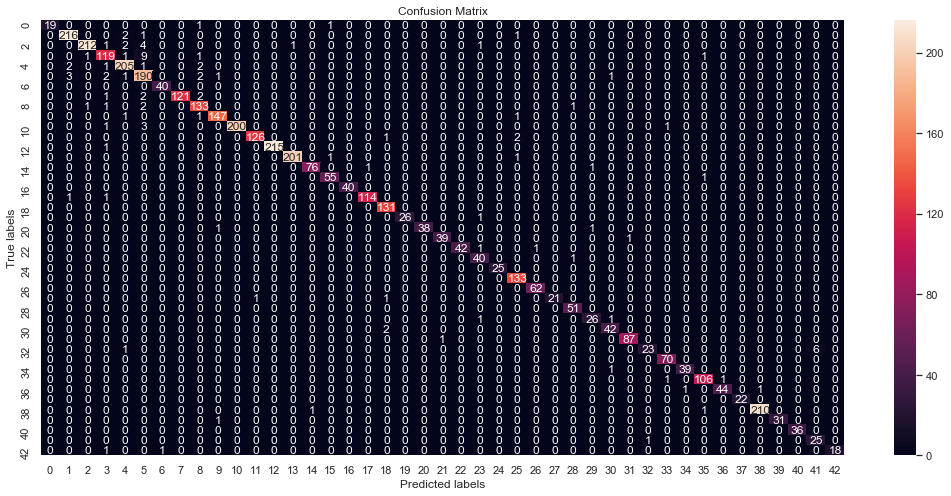

In [20]:


cm_p = confusion_matrix(np.argmax(y_test,axis=1), y_pred_b)
sns.set(rc = {'figure.figsize':(18,8)})
ax = plt.subplot()
sns.heatmap(cm_p, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


# RBF

Gönderdiğiniz rbf kodları ile verileri eğitmeye çalıştım fakat olmadı sanırım çok kötü sonuçlar aldım.

RBF katmanını 100 nörondan ve öğrenme oranını 0.001 olarak belirledim.

In [37]:
from keras.layers import Layer
from keras import backend as K
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)
    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)
    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff,2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)


from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model_rbf = Sequential()
model_rbf.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
#model_rbf.add(Dense(43)
#model_rbf.add(RBFLayer(200, 0.5))
model_rbf.add(RBFLayer(100, 0.001))

#model_rbf.add(Dense(100, activation='rbf'))
model_rbf.add(Dense(43, activation='sigmoid', name='foo'))

model_rbf.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

history_r=model_rbf.fit(x_train, y_train, batch_size=32, epochs=3,validation_data=(x_val,y_val))


Epoch 1/3
981/981 [==============================] - 53s 53ms/step - loss: 3.6279 - accuracy: 0.0567 - val_loss: 3.5404 - val_accuracy: 0.0592
Epoch 2/3
981/981 [==============================] - 52s 53ms/step - loss: 3.5144 - accuracy: 0.0573 - val_loss: 3.4910 - val_accuracy: 0.0581
Epoch 3/3
981/981 [==============================] - 52s 53ms/step - loss: 3.4906 - accuracy: 0.0579 - val_loss: 3.4802 - val_accuracy: 0.0599


# Modelin yapısı

Modelin RBF yapısı gösterildi.

In [38]:
model_rbf.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 3072)              0         
                                                                 
 rbf_layer_10 (RBFLayer)     (None, 100)               307200    
                                                                 
 foo (Dense)                 (None, 43)                4343      
                                                                 
Total params: 311,543
Trainable params: 311,543
Non-trainable params: 0
_________________________________________________________________


# Eğitim sırasındaki accuracy ve loss

Eğitim sırasında elde ettiğim accuracy ve loss değerleri grafiği çizdirildi. Fakat sanırım düzgün modelleme yapamadığım için sonuçlar grafikte de gösterilemedi. 

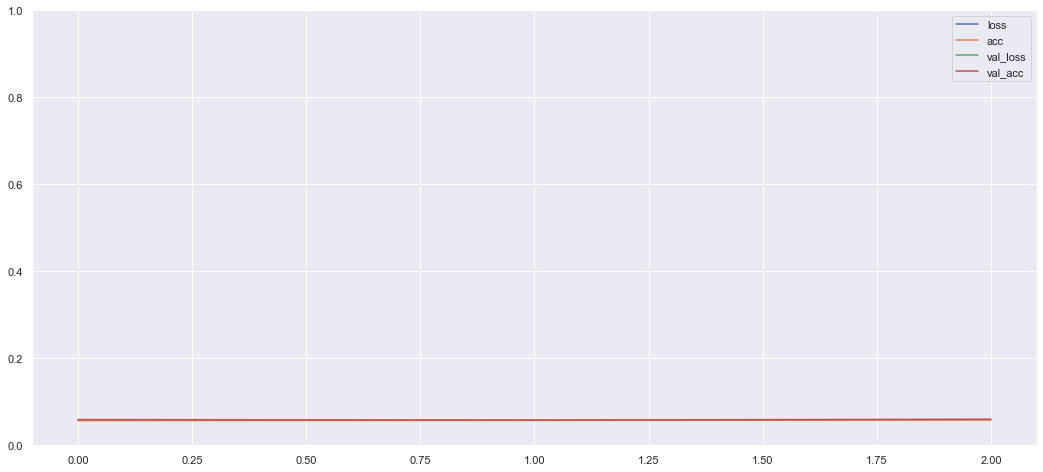

In [39]:
c=pd.DataFrame(history_r.history)

plt.plot(c)
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(["loss","acc","val_loss","val_acc"])


# RBF accuracy sonuçları

Eğitim , test ve validasyon sonuçları %5.8 ortalamasında çıktı. Bu model başarısız gözükmektedir.

In [40]:
y_pred =np.argmax( model_rbf.predict(x_test),axis=1)
y_pred
np.argmax(y_test,axis=1)
print('- Test set accuracy: {:.2f}%\n- Training accuracy: {:.2f}%\n- Validation accuracy: {:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred)*100,(history_r.history['accuracy'][-1])*100,(history_r.history['val_accuracy'][-1])*100))



- Test set accuracy: 5.81%
- Training accuracy: 5.79%
- Validation accuracy: 5.99%


# confusion matrix

confusion matrix tablosuna baktığımızda 2. sınıfa hepsini adreslediği gözükmektedir. Modelimiz neredeyse hiç öğrenmemiş.

Text(0.5, 1, 'Confusion Matrix')

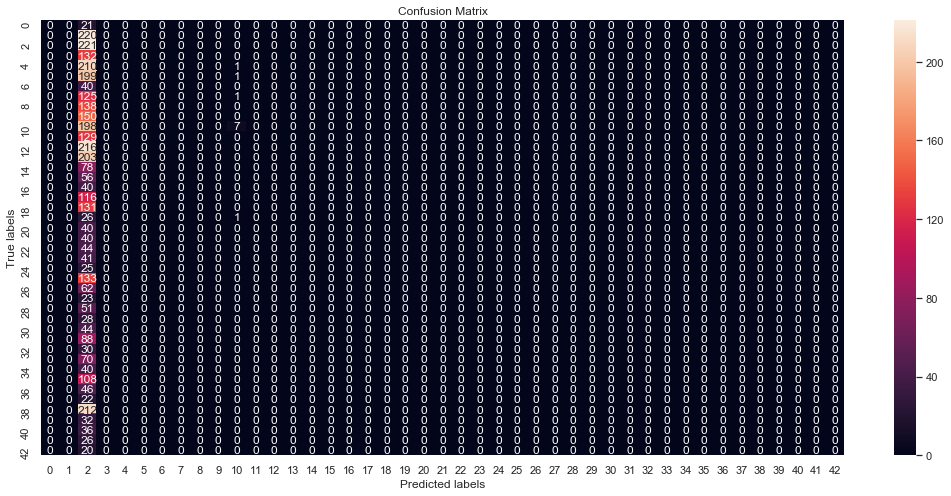

In [41]:
cm_r = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
sns.set(rc = {'figure.figsize':(18,8)})
ax = plt.subplot()
sns.heatmap(cm_r, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Karşılaştırma

Base model: 3 gizli katman 300 nöron ve relu aktivasyon fonksiyonu ve çıkış katmanında 43 nöron ile softmax aktivasyon fonksiyonu kullanılmıştır. Optmizer olarak sgd ve epoch sayısı 100 ile beraber batch size=32 olarak eğitim yapılmıştır.

- Test set accuracy: 97.25%
- Training accuracy: 98.39%
- Validation accuracy: 97.42%

Hiper Parametre model: 2 gizli katman 200 nöron ve relu aktivasyon fonksiyonu ve çıkış katmanında 43 nöron ile softmax aktivasyon fonksiyonu kullanılmıştır. Optimizer olarak adam ve epoch sayısı 10 ile beraber batch size=32 olarak eğitim yapılmıştır. Öğrenme oranı 0.001 parametresi girilmiştir.

- Test set accuracy: 97.32%
- Training accuracy: 96.38%
- Validation accuracy: 96.74%

RBF Model: RBF katmanını 100 nöron ve öğrenme oranını 0.001 seçtim fakat bu modeli veri setinde uygulayamamış olmam lazım sonuçlar çok kötü çıktı.

- Test set accuracy: 5.81%
- Training accuracy: 5.79%
- Validation accuracy: 5.99%

# Confusion Matrix karşılaştırmaları

Text(0.5, 1, 'BASE MODEL -- Confusion Matrix')

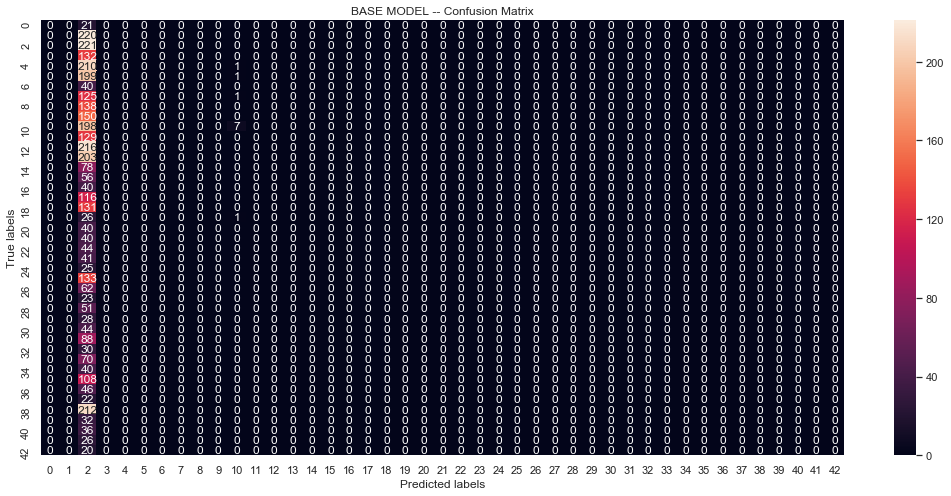

In [47]:
cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
sns.set(rc = {'figure.figsize':(18,8)})
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('BASE MODEL -- Confusion Matrix')




Text(0.5, 1, ' Hiper Parametreli Model -- Confusion Matrix')

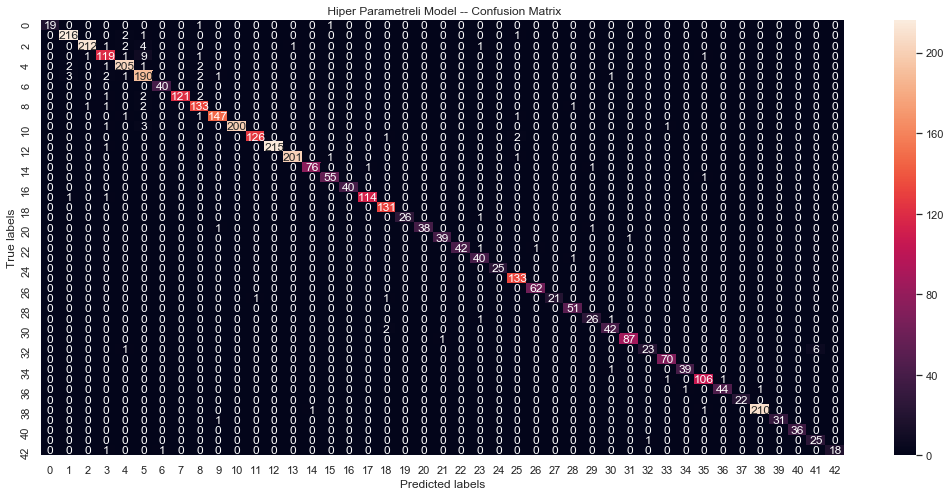

In [44]:

cm_p = confusion_matrix(np.argmax(y_test,axis=1), y_pred_b)
sns.set(rc = {'figure.figsize':(18,8)})
ax = plt.subplot()
sns.heatmap(cm_p, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title(' Hiper Parametreli Model -- Confusion Matrix')

Text(0.5, 1, 'RBF Model -- Confusion Matrix')

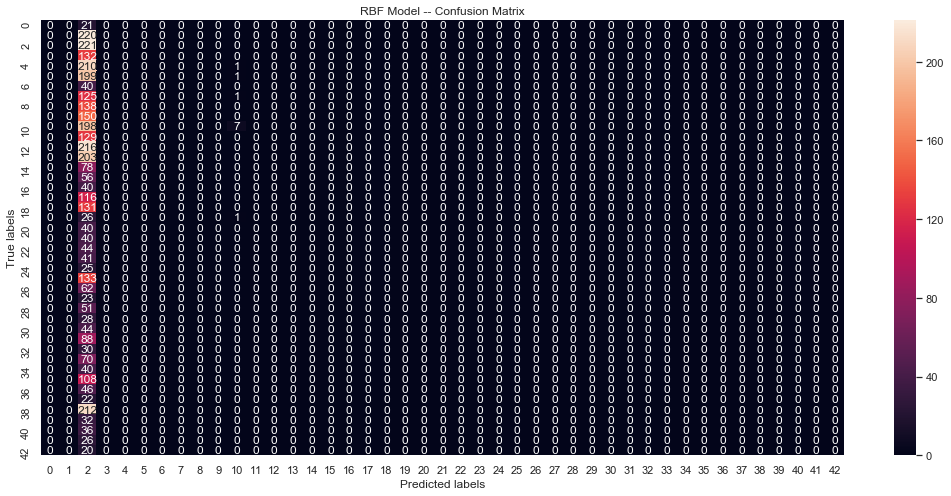

In [45]:


cm_r = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
sns.set(rc = {'figure.figsize':(18,8)})
ax = plt.subplot()
sns.heatmap(cm_r, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('RBF Model -- Confusion Matrix')